In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
from collections import Counter

In [3]:
data = pd.read_csv('preprocessed_data.csv',nrows = 5000)
data.shape

(5000, 9)

In [4]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [22]:
y = data['project_is_approved'].values
x = data.drop(['project_is_approved'],axis = 1)
x.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


## Stratified sampling

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, stratify = y)
xtrain, xcv, ytrain, ycv = train_test_split(xtrain, ytrain, test_size=0.33, stratify = ytrain)

## Encoding the text & categorical features using count vectorizer

### Essay

In [29]:
vect = CountVectorizer(min_df = 10, ngram_range = (1,4), max_features = 50000)
vect.fit(xtrain['essay'].values)
xtrain_essay_bow = vect.transform(xtrain['essay'].values)
xcv_essay_bow = vect.transform(xcv['essay'].values)
xtest_essay_bow = vect.transform(xtest['essay'].values)

In [33]:
print('Essay xtrain->',xtrain_essay_bow.shape)
print('Essay xcv->',xcv_essay_bow.shape)
print('Essay xtest->',xtest_essay_bow.shape)

Essay xtrain-> (2244, 6941)
Essay xcv-> (1106, 6941)
Essay xtest-> (1650, 6941)


### school_state

In [34]:
vect.fit(xtrain['school_state'].values)
xtrain_state_bow = vect.transform(xtrain['school_state'].values)
xcv_state_bow = vect.transform(xcv['school_state'].values)
xtest_state_bow = vect.transform(xtest['school_state'].values)

In [35]:
print('school state xtrain->',xtrain_state_bow.shape)
print('school state xcv->',xcv_state_bow.shape)
print('school state xtest->',xtest_state_bow.shape)

school state xtrain-> (2244, 40)
school state xcv-> (1106, 40)
school state xtest-> (1650, 40)


### teacher_prefix

In [39]:
vect.fit(xtrain['teacher_prefix'].values)
xtrain_teacher_bow = vect.transform(xtrain['teacher_prefix'].values)
xcv_teacher_bow = vect.transform(xcv['teacher_prefix'].values)
xtest_teacher_bow = vect.transform(xtest['teacher_prefix'].values)

In [40]:
print('teacher prefix xtrain->',xtrain_teacher_bow.shape)
print('teacher prefix xcv->',xtrain_teacher_bow.shape)
print('teacher prefix xtest->',xtrain_teacher_bow.shape)

teacher prefix xtrain-> (2244, 4)
teacher prefix xcv-> (2244, 4)
teacher prefix xtest-> (2244, 4)


### project_grade_category

In [41]:
vect.fit(xtrain['project_grade_category'].values)
xtrain_grade_bow = vect.transform(xtrain['project_grade_category'].values)
xcv_grade_bow = vect.transform(xcv['project_grade_category'].values)
xtest_grade_bow = vect.transform(xtest['project_grade_category'].values)

In [42]:
print('teacher prefix xtrain->',xtrain_grade_bow.shape)
print('teacher prefix xcv->',xcv_grade_bow.shape)
print('teacher prefix xtest->',xtest_grade_bow.shape)

teacher prefix xtrain-> (2244, 4)
teacher prefix xcv-> (1106, 4)
teacher prefix xtest-> (1650, 4)


### clean_categories

In [43]:
vect.fit(xtrain['clean_categories'].values)
xtrain_categ_bow = vect.transform(xtrain['clean_categories'].values)
xcv_categ_bow = vect.transform(xcv['clean_categories'].values)
xtest_categ_bow = vect.transform(xtest['clean_categories'].values)

In [44]:
print('teacher prefix xtrain->',xtrain_categ_bow.shape)
print('teacher prefix xcv->',xcv_categ_bow.shape)
print('teacher prefix xtest->',xtest_categ_bow.shape)

teacher prefix xtrain-> (2244, 27)
teacher prefix xcv-> (1106, 27)
teacher prefix xtest-> (1650, 27)


### clean_subcategories

In [45]:
vect.fit(xtrain['clean_subcategories'].values)
xtrain_sub_bow = vect.transform(xtrain['clean_subcategories'].values)
xcv_sub_bow = vect.transform(xcv['clean_subcategories'].values)
xtest_sub_bow = vect.transform(xtest['clean_subcategories'].values)

In [46]:
print('teacher prefix xtrain->',xtrain_sub_bow.shape)
print('teacher prefix xcv->',xcv_sub_bow.shape)
print('teacher prefix xtest->',xtest_sub_bow.shape)

teacher prefix xtrain-> (2244, 54)
teacher prefix xcv-> (1106, 54)
teacher prefix xtest-> (1650, 54)


### price

In [49]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit(xtrain['price'].values.reshape(-1,1))
xtrain_price = norm.transform(xtrain['price'].values.reshape(-1,1))
xcv_price = norm.transform(xcv['price'].values.reshape(-1,1))
xtest_price = norm.transform(xtest['price'].values.reshape(-1,1))

In [50]:
print('price xtrain->',xtrain_price.shape)
print('price xcv->',xcv_price.shape)
print('price xtest->',xtest_price.shape)

price xtrain-> (2244, 1)
price xcv-> (1106, 1)
price xtest-> (1650, 1)


### teacher_number_of_previously_posted_projects

In [51]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit(xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
xtrain_count = norm.transform(xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
xcv_count = norm.transform(xcv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
xtest_count = norm.transform(xtest['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [52]:
print('price xtrain->',xtrain_count.shape)
print('price xcv->',xcv_count.shape)
print('price xtest->',xtest_count.shape)

price xtrain-> (2244, 1)
price xcv-> (1106, 1)
price xtest-> (1650, 1)


In [54]:
from scipy.sparse import hstack
xtrain_csr = hstack((xtrain_essay_bow,xtrain_state_bow,xtrain_teacher_bow,xtrain_grade_bow,xtrain_categ_bow,xtrain_sub_bow,xtrain_price, xtrain_count)).tocsr()
xcv_csr = hstack((xcv_essay_bow,xcv_state_bow,xcv_teacher_bow,xcv_grade_bow,xcv_categ_bow,xcv_sub_bow,xcv_price, xcv_count)).tocsr()
xtest_csr = hstack((xtest_essay_bow,xtest_state_bow,xtest_teacher_bow,xtest_grade_bow,xtest_categ_bow,xtest_sub_bow,xtest_price, xtest_count)).tocsr()

In [55]:
print('xtrain_csr->',xtrain_csr.shape)
print('xcv_csr->',xcv_csr.shape)
print('xtest_csr->',xtest_csr.shape)

xtrain_csr-> (2244, 7072)
xcv_csr-> (1106, 7072)
xtest_csr-> (1650, 7072)


In [56]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

## Apply KNN classifier

In [76]:
def batch_predict(model, xt):
    loop_times = xt.shape[0] - xt.shape[0]%1000
    ydata_pred = []
    print('shape:', xt.shape)
    for i in range(0,loop_times, 1000):
        ydata_pred.extend(model.predict_proba(xt[i:i+1000])[:,1])
    if xt.shape[0]%1000 != 0:
        ydata_pred.extend(model.predict_proba(xt[loop_times:])[:,1])
    return ydata_pred

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

shape: (2244, 7072)
shape: (1106, 7072)


 17%|██████████████                                                                      | 1/6 [00:00<00:03,  1.27it/s]

shape: (2244, 7072)
shape: (1106, 7072)


 33%|████████████████████████████                                                        | 2/6 [00:01<00:03,  1.23it/s]

shape: (2244, 7072)
shape: (1106, 7072)


 50%|██████████████████████████████████████████                                          | 3/6 [00:02<00:02,  1.17it/s]

shape: (2244, 7072)
shape: (1106, 7072)


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:03<00:01,  1.18it/s]

shape: (2244, 7072)
shape: (1106, 7072)


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:04<00:00,  1.18it/s]

shape: (2244, 7072)
shape: (1106, 7072)


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.17it/s]


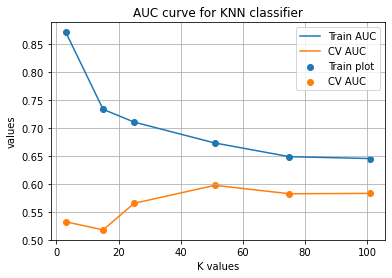

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

n_parms = [3,15,25,51,75,101]

data_loop = data.shape[0] - data.shape[0]%1000

train_auc_score = []
cv_auc_score = []

for i in tqdm(n_parms):
    classifier = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    classifier.fit(xtrain_csr,ytrain)
    
    ypred_train = batch_predict(classifier, xtrain_csr)
    ypred_cv = batch_predict(classifier, xcv_csr)
    
    train_auc_score.append(roc_auc_score(ytrain, ypred_train))
    cv_auc_score.append(roc_auc_score(ycv, ypred_cv))

import matplotlib.pyplot as plt
plt.plot(n_parms, train_auc_score, label = 'Train AUC')
plt.plot(n_parms, cv_auc_score, label = 'CV AUC')
plt.scatter(n_parms, train_auc_score, label = 'Train plot')
plt.scatter(n_parms, cv_auc_score, label = 'CV AUC')
plt.legend()
plt.xlabel('K values')
plt.ylabel('values')
plt.title('AUC curve for KNN classifier')
plt.grid()
plt.show()
    

## RandomizedSearchCV

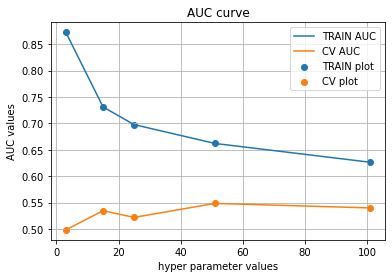

In [105]:
neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':[3, 15, 25, 51, 101]}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(xtrain_csr, ytrain)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_auc = results['mean_train_score']
cv_auc = results['mean_test_score'] 

plt.plot(parameters['n_neighbors'], train_auc, label = 'TRAIN AUC')
plt.plot(parameters['n_neighbors'], cv_auc, label = 'CV AUC')
plt.scatter(parameters['n_neighbors'], train_auc, label = 'TRAIN plot')
plt.scatter(parameters['n_neighbors'], cv_auc, label = 'CV plot')
plt.legend()
plt.xlabel('hyper parameter values')
plt.ylabel('AUC values')
plt.title('AUC curve')
plt.grid()
plt.show()

shape: (2244, 7072)
shape: (1650, 7072)


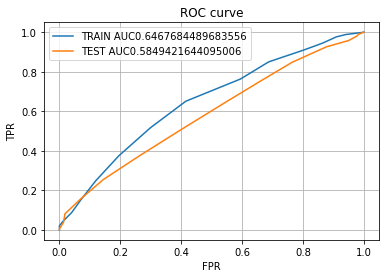

In [112]:
k_best = 102

neigh_best = KNeighborsClassifier(n_neighbors = k_best, n_jobs = -1)
neigh_best.fit(xtrain_csr, ytrain)

ytrain_pred = batch_predict(neigh_best, xtrain_csr)
ytest_pred = batch_predict(neigh_best, xtest_csr)

tr_fpr, tr_tpr, tr_threshold = roc_curve(ytrain, ytrain_pred)
ts_fpr, ts_tpr, ts_threshold = roc_curve(ytest, ytest_pred)

plt.plot(tr_fpr, tr_tpr, label = 'TRAIN AUC'+str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr, ts_tpr, label = 'TEST AUC'+str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.grid()
plt.show()

## Confusion matrix for both train and test 

In [123]:
def predict_for_best_t(tr, t):
    predictions = []
    for i in tr:
        if i >= t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def find_best_threshold(fpr, tpr, threshold):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print('threshold is :',np.round(t,3))
    return t

In [131]:
t = find_best_threshold(tr_fpr, tr_tpr, tr_threshold)

print('*'*5,'train data','*'*5)
print(confusion_matrix(ytrain, predict_for_best_t(ytrain_pred, t)))
print('*'*5,'test data','*'*5)
print(confusion_matrix(ytest, predict_for_best_t(ytest_pred, t)))

threshold is : 0.833
***** train data *****
[[ 176  125]
 [ 678 1265]]
***** test data *****
[[101 120]
 [510 919]]


## Apply Average W2V featurization on essay feature

In [134]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [137]:
avg_w2vec_train = []
for i in tqdm(xtrain['essay'].values):
    vector = np.zeros(300)
    count_words = 0
    for word in i.split():
        if word in glove_words:
            vector = model[word]
            count_words += 1
    if count_words != 0:
        vector /= count_words
    avg_w2vec_train.append(vector)

print(len(avg_w2vec_train))
print(len(avg_w2vec_train[0]))

100%|████████████████████████████████████████████████████████████████████████████| 2244/2244 [00:00<00:00, 6157.24it/s]

2244
300


In [140]:
avg_w2vec_cv = []
for i in tqdm(xcv['essay'].values):
    vector = np.zeros(300)
    count_words = 0
    for word in i.split():
        if word in glove_words:
            vector = model[word]
            count_words += 1
    if count_words != 0:
        vector /= count_words
    avg_w2vec_cv.append(vector)

print(len(avg_w2vec_cv))
print(len(avg_w2vec_cv[0]))

100%|████████████████████████████████████████████████████████████████████████████| 1106/1106 [00:00<00:00, 5924.35it/s]

1106
300


In [141]:
avg_w2vec_test = []
for sentence in tqdm(xtest['essay'].values):
    vector = np.zeros(300)
    count_words = 0
    for word in sentence.split():
        if word in glove_words:
            vector = model[word]
            count_words += 1
    if count_words != 0:
        vector /= count_words
    avg_w2vec_test.append(vector)

print(len(avg_w2vec_test))
print(len(avg_w2vec_test[0]))

100%|████████████████████████████████████████████████████████████████████████████| 1650/1650 [00:00<00:00, 5470.76it/s]

1650
300


In [142]:
from scipy.sparse import hstack
xtrain_csr = hstack((avg_w2vec_train,xtrain_state_bow,xtrain_teacher_bow,xtrain_grade_bow,xtrain_categ_bow,xtrain_sub_bow,xtrain_price, xtrain_count)).tocsr()
xcv_csr = hstack((avg_w2vec_cv,xcv_state_bow,xcv_teacher_bow,xcv_grade_bow,xcv_categ_bow,xcv_sub_bow,xcv_price, xcv_count)).tocsr()
xtest_csr = hstack((avg_w2vec_test,xtest_state_bow,xtest_teacher_bow,xtest_grade_bow,xtest_categ_bow,xtest_sub_bow,xtest_price, xtest_count)).tocsr()

In [143]:
print('xtrain_csr->',xtrain_csr.shape)
print('xcv_csr->',xcv_csr.shape)
print('xtest_csr->',xtest_csr.shape)

xtrain_csr-> (2244, 431)
xcv_csr-> (1106, 431)
xtest_csr-> (1650, 431)


## Now apply hper parameter tuning followed by confusion matrix

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

shape: (2244, 431)
shape: (1106, 431)


 17%|██████████████                                                                      | 1/6 [00:02<00:12,  2.53s/it]

shape: (2244, 431)
shape: (1106, 431)


 33%|████████████████████████████                                                        | 2/6 [00:05<00:10,  2.53s/it]

shape: (2244, 431)
shape: (1106, 431)


 50%|██████████████████████████████████████████                                          | 3/6 [00:07<00:07,  2.52s/it]

shape: (2244, 431)
shape: (1106, 431)


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:10<00:05,  2.59s/it]

shape: (2244, 431)
shape: (1106, 431)


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:13<00:02,  2.64s/it]

shape: (2244, 431)
shape: (1106, 431)


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.60s/it]


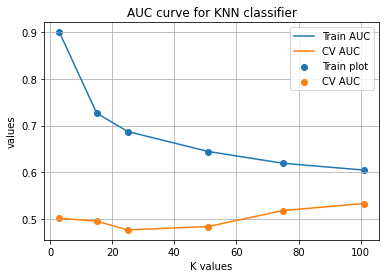

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

n_parms = [3,15,25,51,75,101]

data_loop = data.shape[0] - data.shape[0]%1000

train_auc_score = []
cv_auc_score = []

for i in tqdm(n_parms):
    classifier = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    classifier.fit(xtrain_csr,ytrain)
    
    ypred_train = batch_predict(classifier, xtrain_csr)
    ypred_cv = batch_predict(classifier, xcv_csr)
    
    train_auc_score.append(roc_auc_score(ytrain, ypred_train))
    cv_auc_score.append(roc_auc_score(ycv, ypred_cv))

import matplotlib.pyplot as plt
plt.plot(n_parms, train_auc_score, label = 'Train AUC')
plt.plot(n_parms, cv_auc_score, label = 'CV AUC')
plt.scatter(n_parms, train_auc_score, label = 'Train plot')
plt.scatter(n_parms, cv_auc_score, label = 'CV AUC')
plt.legend()
plt.xlabel('K values')
plt.ylabel('values')
plt.title('AUC curve for KNN classifier')
plt.grid()
plt.show()

shape: (2244, 431)
shape: (1650, 431)


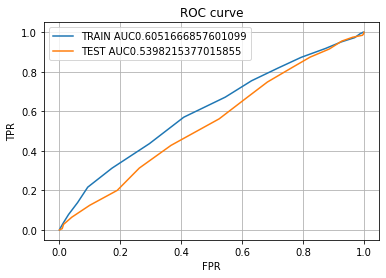

In [145]:
k_best = 102

neigh_best = KNeighborsClassifier(n_neighbors = k_best, n_jobs = -1)
neigh_best.fit(xtrain_csr, ytrain)

ytrain_pred = batch_predict(neigh_best, xtrain_csr)
ytest_pred = batch_predict(neigh_best, xtest_csr)

tr_fpr, tr_tpr, tr_threshold = roc_curve(ytrain, ytrain_pred)
ts_fpr, ts_tpr, ts_threshold = roc_curve(ytest, ytest_pred)

plt.plot(tr_fpr, tr_tpr, label = 'TRAIN AUC'+str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr, ts_tpr, label = 'TEST AUC'+str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.grid()
plt.show()

In [146]:
t = find_best_threshold(tr_fpr, tr_tpr, tr_threshold)

print('*'*5,'train data','*'*5)
print(confusion_matrix(ytrain, predict_for_best_t(ytrain_pred, t)))
print('*'*5,'test data','*'*5)
print(confusion_matrix(ytest, predict_for_best_t(ytest_pred, t)))

threshold is : 0.873
***** train data *****
[[ 178  123]
 [ 835 1108]]
***** test data *****
[[105 116]
 [626 803]]
